In [31]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.linalg import eigh
%matplotlib inline


def get_kernel(gamma):
    def kernel(x0, x1):
        return np.exp(-gamma*( (x0[0]-x1[0])**2 + (x0[1]-x1[1])**2 ))
    return 



def kpca(train_data, kernel):
    N = len(train_data)
    k0 = np.zeros(shape=(N,N))
    for n0, x0 in enumerate(train_data):
        for n1, x1 in enumerate(train_data):
            k0[n0,n1] = kernel(x0,x1)
    one_n = np.ones(shape=(N,N)) / N
    gram = k0 - one_n.dot(k0) - k0.dot(one_n) + one_n.dot(k0).dot(one_n)
    eigvals, eigvecs = eigh(gram)
    
    def comp(x, i):
        result = 0
        for n in range(N):
            result += eigvecs[n,-i] * kernel(x, train_data[n])
        return result/np.sqrt(eigvals[-i]*N)
    
    return comp



In [32]:
train_data, labels = make_moons(n_samples=100, random_state=123)
comp = kpca(train_data, get_kernel(10.0))

TypeError: 'NoneType' object is not callable

[array([ -4.06876610e-14,  -5.99831817e-14,  -8.55889188e-14,
        -1.18202553e-13,  -1.58000136e-13,  -2.04413394e-13,
        -2.55966142e-13,  -3.10225112e-13,  -3.63908784e-13,
        -4.13170226e-13,  -4.54031127e-13,  -4.82903429e-13,
        -4.97104042e-13,  -4.95257443e-13,  -4.77494728e-13,
        -4.45391970e-13,  -4.01632803e-13,  -3.49412037e-13,
        -2.91601317e-13,  -2.29665401e-13,  -1.62260019e-13,
        -8.34126745e-14,   1.96799469e-14,   1.68621383e-13,
         3.93335270e-13,   7.23272238e-13,   1.15700783e-12,
         1.58301048e-12,   1.60008789e-12,   1.46488899e-13,
        -5.21351603e-12,  -1.95818908e-11,  -5.29451636e-11,
        -1.23796310e-10,  -2.64769006e-10,  -5.30991286e-10,
        -1.01187831e-09,  -1.84694248e-09,  -3.24582800e-09,
        -5.51210987e-09,  -9.06940482e-09,  -1.44870566e-08,
        -2.25012077e-08,  -3.40256876e-08,  -5.01461634e-08,
        -7.20908083e-08,  -1.01171720e-07,  -1.38693740e-07,
        -1.85831233e-07

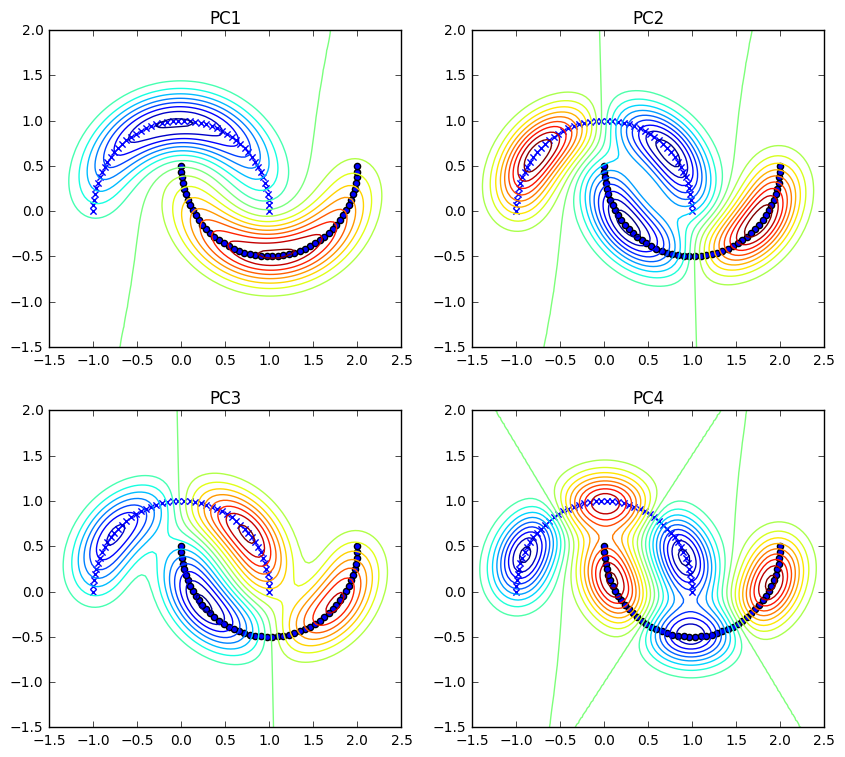

In [33]:


x = np.linspace(-1.5,2.5,100)
y = np.linspace(-1.5,2,100)
X, Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(10,9))
for i in range(1,5):
    subplot = fig.add_subplot(2,2,i)
    subplot.set_xlim(-1.5,2.5)
    subplot.set_ylim(-1.5,2)
    subplot.set_title('PC%d' % i)
    Z = [comp([x,y], i) for (x,y) in zip(X,Y)]
    subplot.contour(X, Y, Z, 20)
    subplot.scatter(train_data[labels==0, 0], train_data[labels==0,1], marker='x')
    subplot.scatter(train_data[labels==1, 0], train_data[labels==1,1], marker='o')

print(Z)

In [36]:
print(np.array(Z).shape)

(100, 100)
